## KNN (Vecino mas cercano)

Es un metodo de aprendisaje supervisado cuya funcionalidad es buscas en los datos mas cercanos de la que se estar trantando predecir y luego clasificarla basado en los datos que la rodean

En este notebook vas a entrenar un modelo KNN

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

from preprocessing import cargarDatasets
from preprocessing import prepararSetDeEntrenamiento
from preprocessing import prepararSetDeValidacion
from preprocessing import ingenieriaDeFeaturesKnn

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split,KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score

## Carga y preprosesamiento de datos

In [2]:
train_df,final_df = cargarDatasets()
train_df = prepararSetDeEntrenamiento(train_df)
final_df = prepararSetDeValidacion(final_df)

ahora que ya tenemos los datasets cargados vamos a ir aplicacion preprocesamientos al dateset de entrenamiento.

In [5]:
X,y,df,y_encoder = ingenieriaDeFeaturesKnn(train_df)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=117, test_size=0.1, stratify=y)

Para la busqueda de hiperametros tenemos en cuenta:
   *  k: la cantidad de vecinos que se va a tener en una instancia.
   *  peso: lo que se le da a la distancia entre los puntos.
   *  metrica    

In [15]:
def hallarMejoresHiperparametros():
    mejor_puntaje = 0
    mejor_k = -1
    mejor_distancia = None
    mejor_metrica = None
    for tipo_distancias in ['uniform', 'distance']:
        for metrica in ['minkowski','cosine','manhattan','euclidean']:
            for k in range(1, 30):
                knn = KNeighborsClassifier(n_neighbors = k,  weights=tipo_distancias, metric = metrica)
                knn.fit(X_train, y_train)
                puntaje = knn.score(X_test, y_test)

                if puntaje > mejor_puntaje:
                    mejor_k = k
                    mejor_puntaje = puntaje
                    mejor_distancia = tipo_distancias
                    mejor_metrica = metrica
    print(" mejor puntaje: ", mejor_puntaje)
    print(" mejor k: ", mejor_k)
    print("mejor distancia: ", mejor_distancia)
    print("mejor metrica: ", mejor_metrica)
    return mejor_puntaje, mejor_k, mejor_distancia, mejor_metrica

    

In [16]:
mejor_valor, mejor_k, mejor_distancia, mejor_metrica = hallarMejoresHiperparametros()

 mejor puntaje:  0.8415719987718759
 mejor k:  24
mejor distancia:  distance
mejor metrica:  minkowski


# Modelo KNN Final
una vez hallados los hiperparametros, vamos a entrenar un modelo defnitiv con estos mismo. 

In [17]:
knn = KNeighborsClassifier(n_neighbors = mejor_k, weights = mejor_distancia, metric = mejor_metrica)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=117, test_size=0.1, stratify=y)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=24, weights='distance')

## Analisis de Metricas

In [21]:
y_pred = knn.predict(X_test)

# Precision, Recall, Acurracy

In [23]:
print(classification_report(y_test, y_pred, target_names=['tiene bajo poder adqusitivo','tiene alto poder adquisitivo']))

                              precision    recall  f1-score   support

 tiene bajo poder adqusitivo       0.87      0.93      0.90      2473
tiene alto poder adquisitivo       0.72      0.56      0.63       784

                    accuracy                           0.84      3257
                   macro avg       0.79      0.75      0.77      3257
                weighted avg       0.83      0.84      0.83      3257



# Accurary 

In [29]:
accuracy_score(y_test, y_pred) 

0.8415719987718759

# Precision 

In [30]:
precision_score(y_test, y_pred)

0.7182410423452769

# Recall

In [31]:
recall_score(y_test, y_pred)

0.5625

# Matriz de confucion 

/home/agus/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


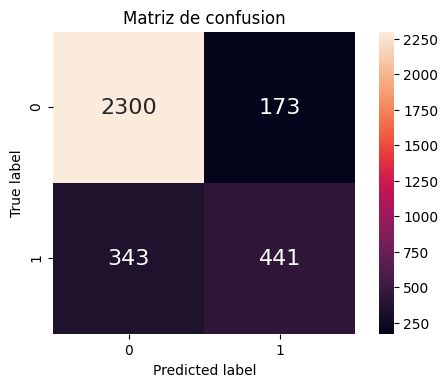

In [34]:
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(y_true, y_pred):
    names = sorted(set(y_true))
    cm = confusion_matrix(y_true, y_pred, names)
    df_cm = pd.DataFrame(cm, names, names)

    plt.figure(dpi=100)
    plt.title("Matriz de confusion")
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g', square=True)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()


plot_confusion_matrix(y_test, knn.predict(X_test))

# Curva AUC ROC

In [37]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [39]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [40]:
def plot_roc(_fpr, _tpr, x):

    roc_auc = auc(_fpr, _tpr)

    plt.figure(figsize=(15, 10))
    plt.plot(
        _fpr, _tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})'
    )
    plt.scatter(_fpr, x)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

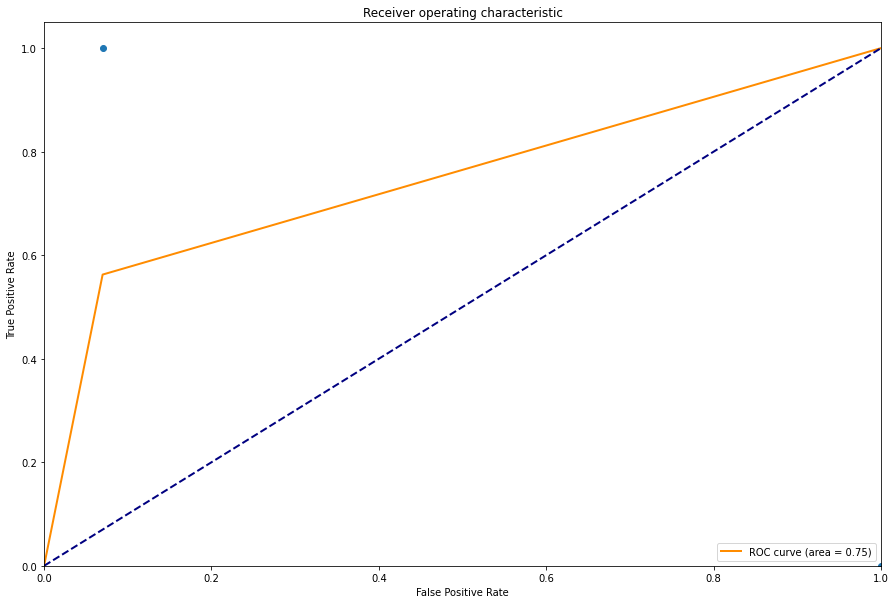

0.8691557597563894

In [41]:
plot_roc(fpr, tpr, thresholds)
roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])